# Importing the required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics

# Reading the dataset

In [3]:
df = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-10_Hierachial_Clustering_and_GMM\heart_failure_clinical_records_dataset.csv")

# A glimpse into the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Dropping the target variable

The dataset has a target variable "DEATH_EVENT" which is not required for clustering and hence is dropped.

In [5]:
df = df.drop(["DEATH_EVENT"],axis=1)

# Seggregating the variables

In [6]:
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype == "int64":
        categorical.append(i)
    else:
        numerical.append(i)

In [7]:
categorical

['anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

In [8]:
numerical

['age', 'platelets', 'serum_creatinine']

Text(0.5, 1.0, 'Types of variables infographics')

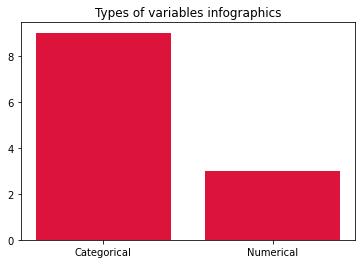

In [9]:
plt.bar([0,1],[len(categorical),len(numerical)],color="crimson")
plt.xticks([0,1],["Categorical","Numerical"])
plt.title("Types of variables infographics")

# Encoding the categorical variables

In [10]:
for i in categorical:
    encoding = dict()
    x = list(set(df[i]))
    for j in range(len(x)):
        encoding[x[j]] = j
    df[i] = df[i].replace(encoding)

# Standardization

In [11]:
ct = ColumnTransformer([
        ('xyz', StandardScaler(), [i for i in range(len(numerical))])
    ], remainder='passthrough')

In [12]:
df = pd.DataFrame(ct.fit_transform(df[df.columns]),columns=df.columns)

# K-Means Clustering

In [13]:
km = KMeans(n_clusters=2)
km.fit(df)

KMeans(n_clusters=2)

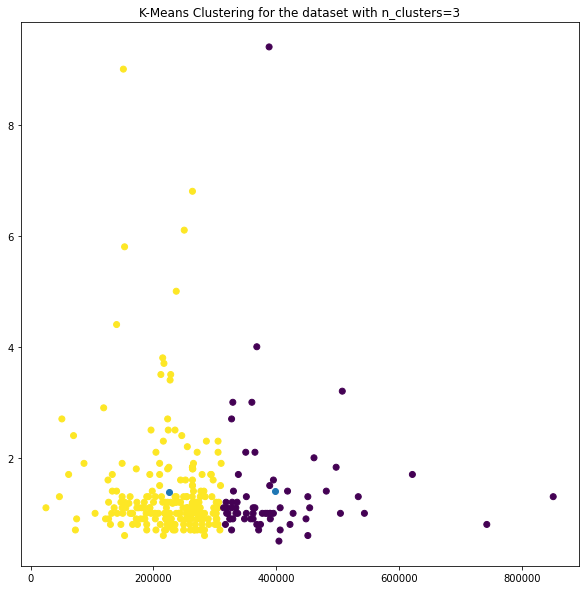

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(df.iloc[:, 6], df.iloc[:, 7], c=km.predict(df))
centers = km.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 7])
plt.title("K-Means Clustering for the dataset with n_clusters=3")
plt.show()

In [15]:
metrics.silhouette_score(df,km.predict(df))

0.5832469939634506

# Hierarchial Clustering

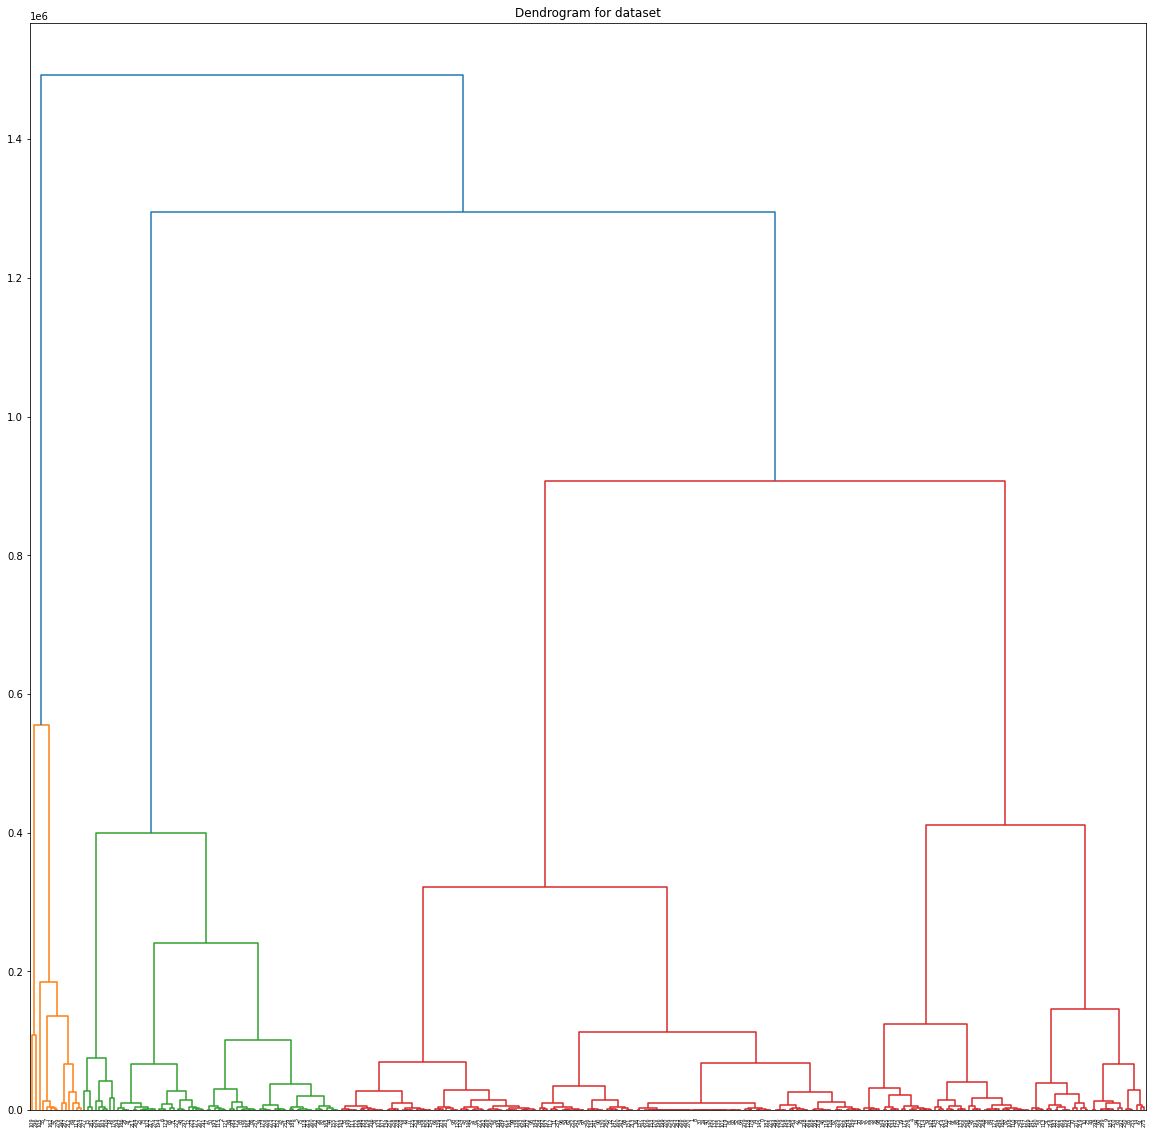

In [16]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 20))  
plt.title("Dendrogram for dataset")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.xticks(rotation=90)
plt.show()

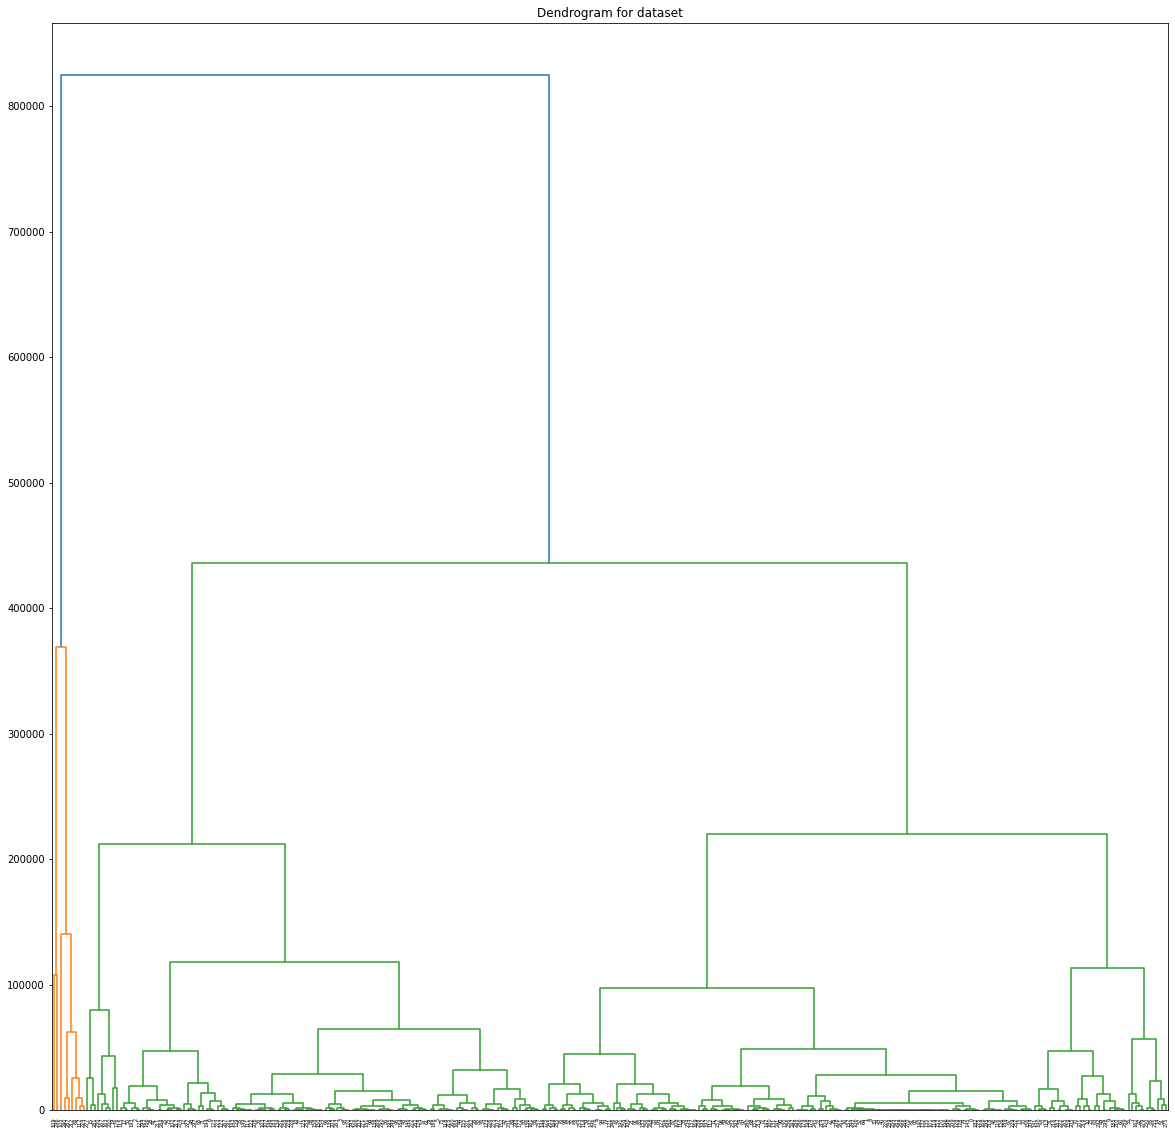

In [17]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 20))  
plt.title("Dendrogram for dataset")  
dend = shc.dendrogram(shc.complete(df))
plt.xticks(rotation=90)
plt.show()

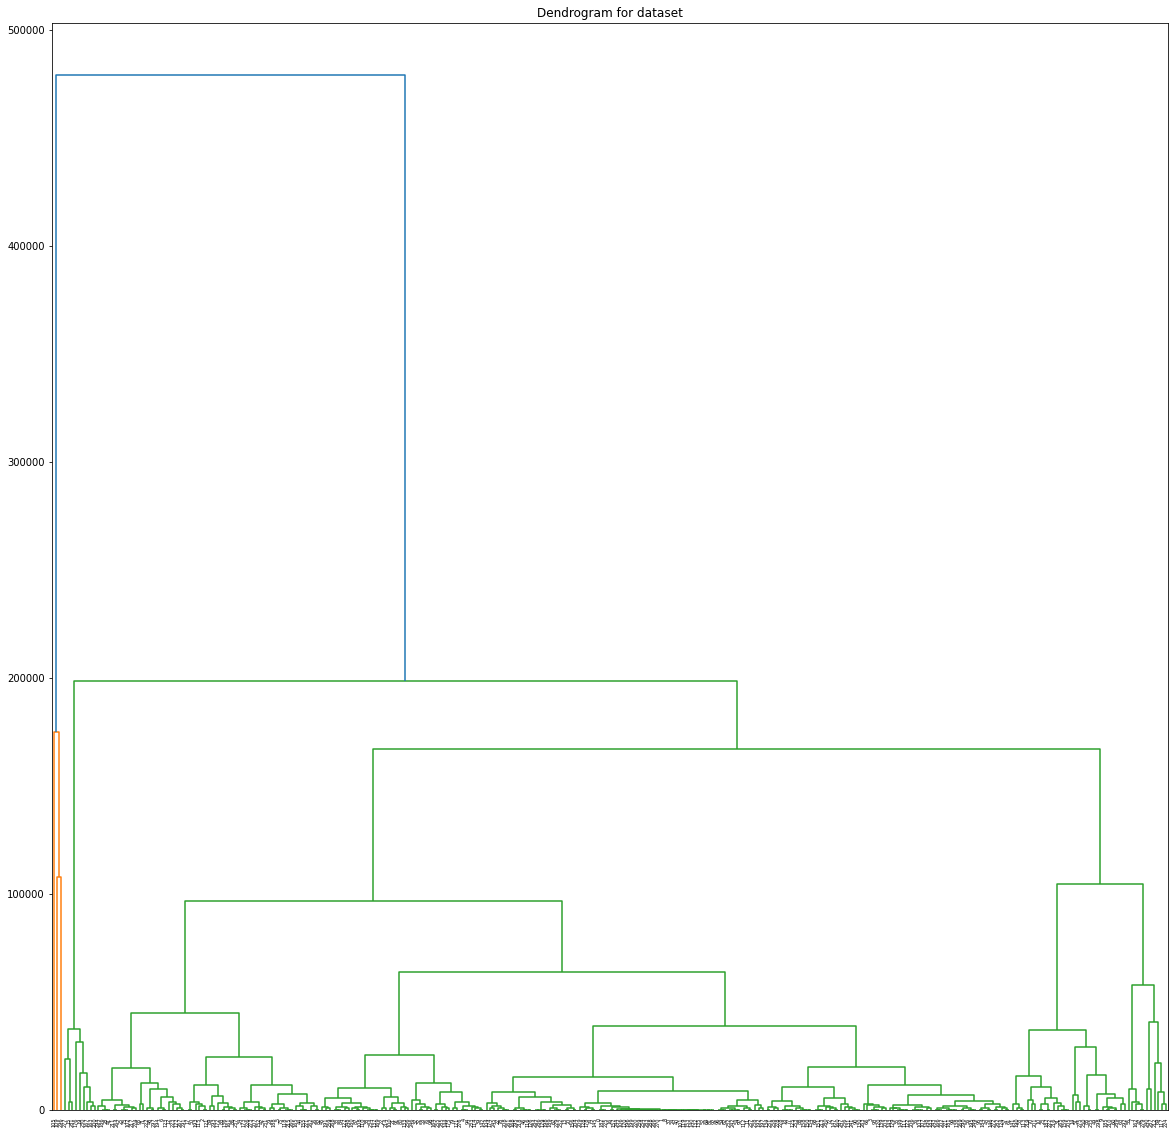

In [18]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 20))  
plt.title("Dendrogram for dataset")  
dend = shc.dendrogram(shc.average(df))
plt.xticks(rotation=90)
plt.show()

2 0.6790716639296762
3 0.5039564445601683
4 0.5403652597584633
5 0.5419200443798907
6 0.5327084842336847
7 0.5360697382377627
8 0.5618256638153484
9 0.5888791257615635
10 0.5857435512684438


<Figure size 1440x2160 with 0 Axes>

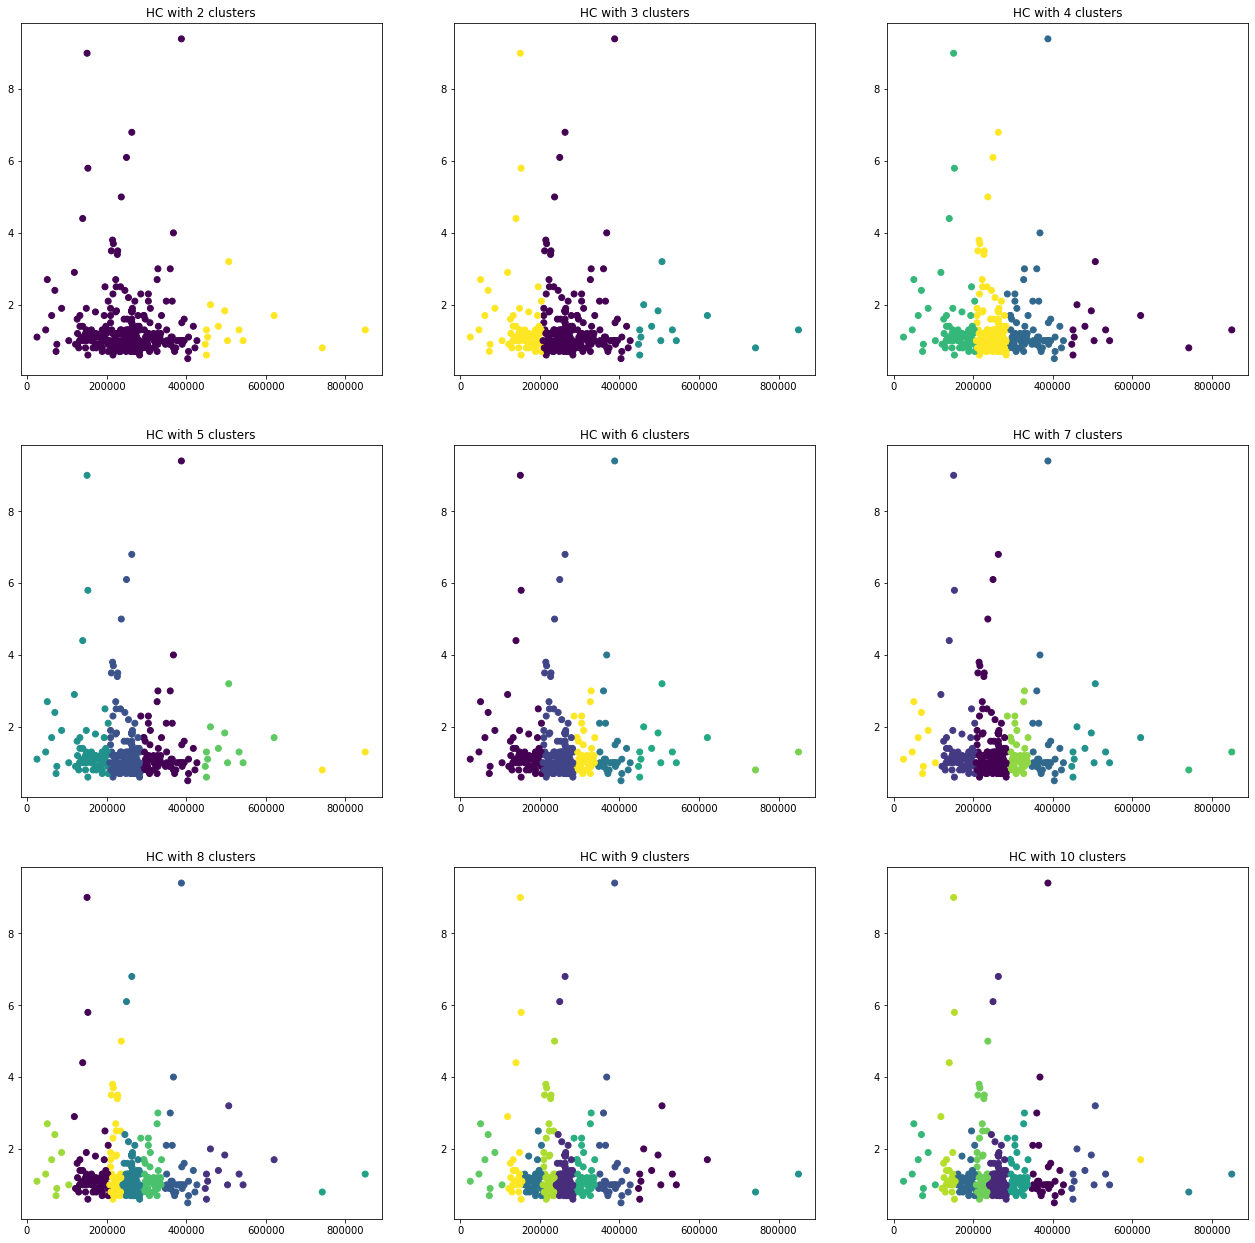

In [19]:
plt.figure(figsize=(20,30))
fig, ax = plt.subplots(nrows=3,ncols=3)
c = 1
for i in range(3): 
 for j in range(3):
  c += 1
  ag = AgglomerativeClustering(n_clusters=c, affinity='euclidean', linkage='ward')
  labels = ag.fit_predict(df)
  print(c,metrics.silhouette_score(df,labels))
  ax[i,j].scatter(df.iloc[:, 6], df.iloc[:, 7], c=labels)
  ax[i,j].set_title("HC with "+str(c)+" clusters")
  fig.set_figheight(22)
  fig.set_figwidth(22)
plt.show()

# Gaussian Mixture Models

2 0.32688510884834093
3 0.030432356363222165
4 0.07612803732600394
5 -0.1702517178368444
6 -0.14226909964341522
7 0.20265669559123334
8 0.44362066160491975
9 0.5081444495882522
10 0.556784817993494


<Figure size 1440x2160 with 0 Axes>

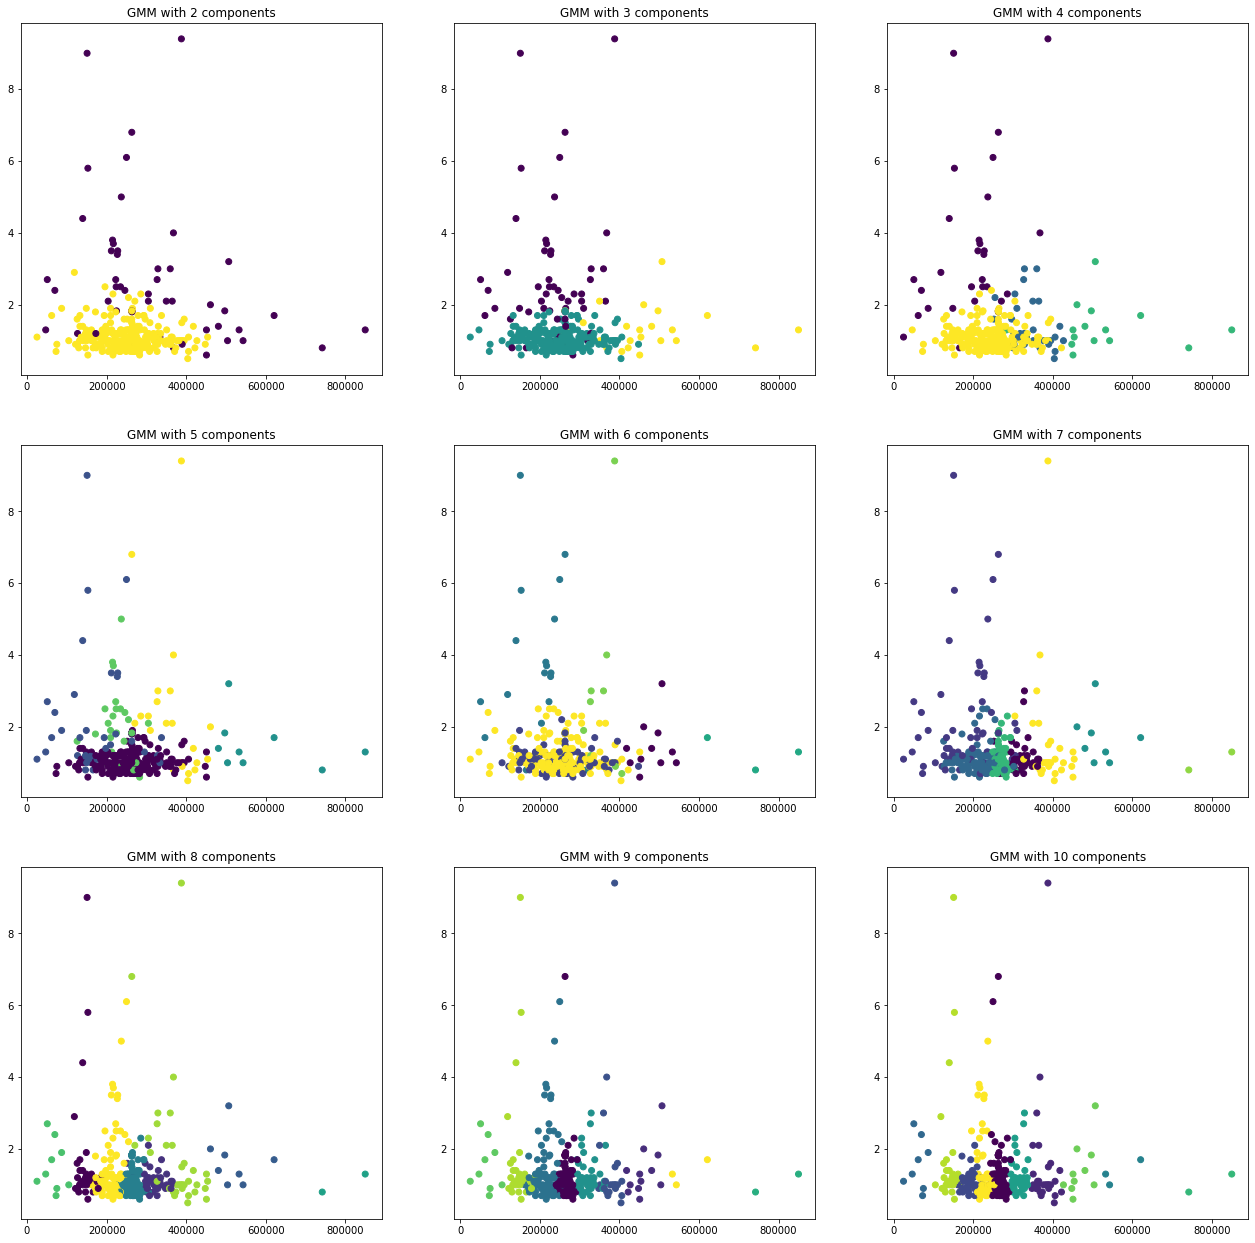

In [20]:
from sklearn import mixture
plt.figure(figsize=(20,30))
fig, ax = plt.subplots(nrows=3,ncols=3)
c = 1
for i in range(3): 
 for j in range(3):
  c += 1
  gmm = mixture.GaussianMixture(n_components=c).fit(df)
  labels = gmm.predict(df)
  print(c,metrics.silhouette_score(df,labels))
  ax[i,j].scatter(df.iloc[:, 6], df.iloc[:, 7], c=labels)
  ax[i,j].set_title("GMM with "+str(c)+" components")
  fig.set_figheight(22)
  fig.set_figwidth(22)
plt.show()

# Inferences

- The dataset was intended for binary classification of the health clinical records as dead or alive.
- Hence, trying to cap the clusters to 2, we find that the best silhouette score is for hierarchial clustering followed by K-means and GMM.
- However, a larger number of clusters in GMM enhances the score however, reduces the score for Hierarchial Clustering.
- Silhouette score is used to infer the quality of clusters. A higher score indicates that the datapoint lies well in the cluster.